## Google Colab Arbeitplatz vorbereiten

In [1]:
!git clone https://github.com/edadunashvili/Monographie.git

Der Befehl "git" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [ ]:
cd /content/Monographie

In [ ]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

# Auswertung

[Zelle # 1]

1-2: Die Variable 'repert' dient der gezielten Auswahl von Texten aus den vordefinierten Herkunftsrepertoires im Trainingsdatenrepositorium. Die Variable kann mit einem oder mehreren Werten ausgefüllt werden, beispielsweise ['deu', 'kat'], oder auch leer bleiben, etwa ['']. Die Variable 'typNum' ermöglicht den gezielten Zugriff auf einen bestimmten Typ innerhalb der ausgewählten Repertoires. Auch diese Variable darf leer bleiben.

3-7: Bei jeder Aggregation des Forschungsdatenkorpus wird der gleichnamige vorherige Korpus gelöscht.

8-60: Die TXT-Dateien im Ordner „Forschungsdaten“ werden im CSV-Format aggregiert und in das Stammverzeichnis verschoben.

61-78: Die Datei 'episode_temp_auswerter.csv' wird geladen, von überflüssigen Zeichen bereinigt und in die Korpusdatei 'episode_string_auswerter.csv' umgewandelt.

79: Überflüssige Aggregation wird entfernt.

80-84: Die im aggregierten Forschungsdatenkorpus vorhandenen Markupelemente (einschließlich der Häufigkeitsindizes) werden abgerufen.

Anmerkung: Der Wert 'ballast' bezieht sich auf den ersten Datensatz im aggregierten Datenkorpus. Er stellt sicher, dass die synthetische Episode 'Anf_' auch dann generiert wird, wenn der erste Datensatz im Korpus die gesuchte Episode ist (vgl. Zelle #2, Zeile 32-33).

In [2]:
repert=['kat']
typNum=''
def entfernen(var):
    import os
    if os.path.exists(var):
        os.remove(var)
entfernen('episode_string_auswerter.csv')
def word_to_lex(word):
    ret=(word) 
    return ret
def write_back(words):
    with open('episode_temp_auswerter.csv',"a", encoding='utf-8', errors='ignore') as output:
        for word in words:
            as_lex = word_to_lex(word[0])
            full_word = '"' + as_lex + '"'
            for sub_word in word[1:]:
                full_word += " , "  '"' + sub_word + '"'
            full_word +="\n"
            output.write(full_word)
def clean(line):
    line = line.replace("\n"," ").strip()
    line = line.replace("ä","ae").replace("ü","ue").replace("ö","oe")
    line = line.replace("ß","ss").replace(",","").replace("«","")
    line = line.replace("»","").replace(".","").replace(":","")
    line = line.replace(";","").replace('"',"")
    line = line.replace("?","").replace("!","").replace("á","a")
    line = line.replace(",","").replace("\t"," ").replace("'","")
    line = line.replace("‹","").replace("›","").replace("-"," ")
    line = line.replace("'('","").replace("')'","").replace('>','')
    line = line.replace("    "," ").replace("   "," ").replace("  "," ")
    line = line.replace('–','').replace('—','').replace('<','')
    line = line.replace("Â", "A").replace("ø", "oe").replace('“','')
    line = line.replace('„','').replace('(','').replace(')','')
    line = line.replace("‚", "").replace(']','').replace('[','')
    if line == "": 
        return
    line=line.split("|")
    line[0]=line[0].split("|")[0]
    for i, _ in enumerate(line):
        if (i !=0) and (i!=2):
            line[i]=line[i].lower()
    flex=[]
    try:
        flex=line[1].split("")
    except:
        pass
    value=str(line)
    line=str(line)   
    flex.append(line)
    ret=[]
    for i in flex:
        ret.append((i,value[0]))
    return ret
    for i in flex:
        ret.append((i,value[0]))
    return ret
with open('episode_temp_auswerter.csv', "w", encoding='utf-8', errors='ignore') as output:
    output.write ("quelle,episode,index_string,index_binar\n")
    output.write('000_ballast,ballast,ballast,0')
    output.write('\n')
pairs = []
import glob as glob
for file in glob.glob("Forschungsdaten/*.txt"):  
    for any in repert:
        if any in file and typNum in file:
            with open(file, 'r', encoding='utf-8', errors='ignore') as episode:  
                for line in episode.readlines():
                        clean_words = clean(line)
                        pairs = pairs + clean_words
write_back(pairs)
fin = open('episode_temp_auswerter.csv','r', encoding ='utf-8')
fout = open('episode_string_auswerter.csv', "wt", encoding ='utf-8')
for kfz in fin:
    fout.write(kfz.replace(', "["',"").replace('"[', "")
               .replace(']"',"").replace("', '", "','")
               .replace(" '", "'").replace("'","").replace ('"',''))
fin.close()
fout.close()
entfernen('episode_temp_auswerter.csv')
import pandas as pd
df = pd.read_csv('episode_string_auswerter.csv', encoding='utf-8')
from collections import Counter
indexliste=Counter(df.index_string)
print(indexliste, sep='\n')

Counter({'e300_c_anfangssituation_ankunft_und_erkundigung_der_not': 26, 'e300_e_vorfeld_des_kampfes_bis_zum_sieg': 26, 'e300_o_auftritt_des_HD_vor_dem_AG_bis_zur_erkennung_seiner_heldentat': 26, 'e554_e_leistung_des_HD_gegenueber_dem_tier_und_aussprechen_der_dankbarkeit': 25, 'e300_i_rueckkehr_des_OB_und_die_suche_nach_dem_HD': 23, 'e300_q_von_der_begegnung_mit_dem_vogel_bis_zum_ende_des_fluges': 22, 'e301_o_von_der_rueckkehr_an_die_oberflaeche_bis_zur_loesung_der_durch_den_raub_verursachten_krise': 21, 'e301_k_empfang_des_OB_und_verrat_des_FH': 20, 'e301_i_vom_betreten_des_wohnsitzes_des_AN_bis_zur_befreiehung_des_OB': 19, 'e301_m_entkommen_aus_dem_haus_des_AN': 18, 'e301_e_vom_beginn_der_reise_bis_zum_finden_der_raststaette_oder_eines_eingangs': 18, 'e301_c_verlust_des_OB': 16, 'eCoM_c_conceptia_magica': 14, 'e516_k_gewinnung_des_OB': 14, 'e301_g_vom_finder_einer_nachtrast_bis_zum_betreten_der_welt_des_AN': 13, 'e516_e_fernliebe_bis_zum_auszug_auf_der_suche_nach_dem_OB': 13, 'e516_m_

[Zelle # 2] 

1-40: Das Skript sorgt dafür, dass die in den betrachteten Texten vorhandenen Annotationen in eine Kette der vorherigen, der gesuchten und der folgenden Episoden als Gliedern der gesamten Kette dargestellt werden.

41-50: Das Skript extrachiert alle im Korpus vorhandene Episoden.

51-66: Die extrahierte Episoden werden an die Glieder der gesuchten Episodengruppe umlegen. Die festlegung der gesuchten Episodengruppe sowie Erschienen der mit einander verkettete Episodenliste erfolgt in der nächsten Zelle.

In [3]:
import pandas as pd
df = pd.read_csv('episode_string_auswerter.csv', encoding='utf-8')
from collections import Counter
def ep_format(ep_full):
    return (ep_full.split('_'))[0]
def ep_name_format(ep_full):
    sublist = (ep_full.split('_'))[0:2]
    name = ""
    for strg in sublist:
        name += strg+'_'
    return name
def ep_name_vollformat(ep_full):
    sublist = (ep_full.split())
    vollname = ""
    for strg in sublist:
        vollname += strg
    return vollname
def quellenvergleich (df, i1, i2):
    return df.quelle[i1]==df.quelle[i2]
def ast(gesep, df):
    ep_tree = {}
    a_liste = []
    z_liste = []  
    df_len = len(df.index_string)
    for i, ep in enumerate(df.index_string):
        if gesep == ep:
            if (i > 0)&(quellenvergleich(df, i, i-1)):
                a = df.index_string[i-1]
            else:
                a = 'Anf-'+ep_name_format(gesep)
            if (i < df_len - 1):
                if not (quellenvergleich(df, i, i+1)):
                    z = 'End-'+ep_name_format(gesep)
                else:        
                    z = df.index_string[i+1]
            else:
                z = 'End-'+ep_name_format(gesep)
            a_liste.append(a)
            z_liste.append(z)
    return {gesep: [Counter(a_liste), Counter(z_liste)]}
def alle_aeste(gesep, df):
    episoden_baeume = {} 
    ep_list = []
    for ep_full in df.index_string:         
        ep = ep_format(ep_full)      
        if gesep == ep:                      
            ep_list.append(ep_full)
    for ep in set(ep_list):
        episoden_baeume.update(ast(ep,df))
    return episoden_baeume
def key_val_printer(d):
    for k, v in d.items():
        print(v, k, sep=':')
def neukey_val_printer(d):
    for k, v in d.items():
        print(k)
def baum_printer(baeume: dict, baum: str):
    key_val_printer (baeume[baum][0])
    print(65*'-')
    print(sum(baeume[baum][0].values()),':', baum)
    print(65*'-')
    key_val_printer(baeume[baum][1])
def wald_printer(wald: dict):
    for baum in sorted(wald.keys()): # for baum in (wald.keys()):
        baum_printer (wald, baum)
        print(65*'=')    

[Zelle # 3] - Hier wird die gesuchte Episode allein oder mit den Episodengruppen aus dem kombinierten Typ bestimmt. Nach Ausführung des Skripts wird die entsprechende Episodenkette ausgewertet. Die resultierende Liste besteht aus Tripletten (durch doppelte Linien getrennte Zeilengruppen). Jede Triplette setzt sich aus einer mittleren Episode (von einfachen Linien umgebene Zeilen) zusammen, die wiederum von einer oder mehreren oberen und unteren Episoden umgeben ist. Jedes Glied aus der gesuchten Episodengruppe soll als Triplette aller drei Mitglieder dargestellt werden. Falls eine Episode keine Anfangs- oder Ergänzungsglieder hat, werden an den entsprechenden Stellen der Liste synthetische Episoden generiert, wie 'Anf-e123_a_' oder 'End-e123_a_'. Somit stellt jede Episode des gesuchten Typs eine mittlere Episode dar und tritt in Bezug auf andere Episoden (der gleichen oder anderer Kategorien) als vorläufige und/oder nachfolgende Episode auf.

1: Eingabefeld für die gesuchte Episode

2 - n: Eingabefeld für kombinierte Episodengruppen (das Eingabefeld <graph.update(alle_aeste("'", df)> kann kopiert und vervielfacht werden.

Letzte Zeile: Visualisierung der Episodenkette.

In [4]:
graph = alle_aeste("e301", df)
graph.update(alle_aeste("e650A", df))
graph.update(alle_aeste("e303", df))
graph.update(alle_aeste("e300", df))
graph.update(alle_aeste("e516", df))
graph.update(alle_aeste("", df))
wald_printer(graph)

18:e301_m_entkommen_aus_dem_haus_des_AN
1:e327a_a_Haensel_und_Gretel
2:e301_k_empfang_des_OB_und_verrat_des_FH
2:e554_e_leistung_des_HD_gegenueber_dem_tier_und_aussprechen_der_dankbarkeit
2:e650A_k_die_letzte_aufgabe
1:Anf-e300_c_
-----------------------------------------------------------------
26 : e300_c_anfangssituation_ankunft_und_erkundigung_der_not
-----------------------------------------------------------------
25:e300_e_vorfeld_des_kampfes_bis_zum_sieg
1:End-e300_c_
25:e300_c_anfangssituation_ankunft_und_erkundigung_der_not
1:Anf-e300_e_
-----------------------------------------------------------------
26 : e300_e_vorfeld_des_kampfes_bis_zum_sieg
-----------------------------------------------------------------
22:e300_i_rueckkehr_des_OB_und_die_suche_nach_dem_HD
3:e300_g_nach_dem_sieg_bis_zur_trennung_des_HD_und_des_OB
1:e300_k_misshandlung_des_FH_bis_zur_hochzeit
3:e300_e_vorfeld_des_kampfes_bis_zum_sieg
1:e300_k_misshandlung_des_FH_bis_zur_hochzeit
------------------------

[Zelle # 4]

1-78: Die in der obigen Liste dargestellten Begegnungen von Typen bzw. Episoden werden in Graphen umgewandelt.

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
def cutoff_ast_data(wuerzel, graph, nachbar_liste, cutoff = 0):
    vor = graph[wuerzel][0]
    zurueck = graph[wuerzel][1]
    nachbarn = vor.copy()
    nachbarn.update(zurueck)
    for ast_name, ast_gewicht in sorted(nachbarn.items()):
        if (ast_gewicht >= cutoff):
             nachbar_liste.append([ep_name_format(wuerzel), 
                                   ep_name_format(ast_name), ast_gewicht]) 
def cutoff_ast_volldata(wuerzel, graph, nachbar_liste, cutoff = 0):
    vor = graph[wuerzel][0]
    zurueck = graph[wuerzel][1]
    nachbarn = vor.copy()
    nachbarn.update(zurueck)
    for ast_name, ast_gewicht in sorted(nachbarn.items()):
        if (ast_gewicht >= cutoff):
             #nachbar_liste.append([ep_name_vollformat(wuerzel), ep_name_vollformat(ast_name), ast_gewicht])
            nachbar_liste.append([wuerzel, ast_name, ast_gewicht]) 
def cutoff_graph_data(graph, cutoff = 0):
    nachbar_liste = []
    for i, (k, v) in enumerate(sorted(graph.items())):
        cutoff_ast_data(k, graph, nachbar_liste, cutoff)
    neue_nachbar_liste = [[i, nachbar] for i, nachbar in enumerate(nachbar_liste)]
    return neue_nachbar_liste
def cutoff_graph_volldata(graph, cutoff = 0):
    nachbar_liste = []
    for i, (k, v) in enumerate(sorted(graph.items())):
        cutoff_ast_volldata(k, graph, nachbar_liste, cutoff)
    neue_nachbar_liste = [[i, nachbar] for i, nachbar in enumerate(nachbar_liste)]
    return neue_nachbar_liste
def interactive_graph_data(graph_data, loesch_index, gew_dict):
    for k, v in gew_dict.items():
        graph_data[k][1][2] = v
    neue_nachbar_liste = [[i, nachbar[1]] for i, 
                          nachbar in enumerate(graph_data) if i not in loesch_index]
    return neue_nachbar_liste
def graph_bauer(graph_data):
    G = nx.Graph()
    w_liste=[]
    for el in graph_data:
        n1 = el[1][0]
        n2 = el[1][1]
        w = el[1][2]
        w_liste.append(w)
        G.add_edge(n1, n2, weight=w)
    return G,w_liste
def show_graph(G,w):
    fh = open("edgelist.utf-8", "wb")
    nx.write_multiline_adjlist(G, fh, 
                               delimiter="\t", encoding="utf-8")
    fh = open("edgelist.utf-8", "rb")
    H = nx.read_multiline_adjlist(fh, 
                                  delimiter="\t", encoding="utf-8")
    for n in G.nodes():
        if n not in H:
            print(False)
    pos = nx.spring_layout(G)
    q = max(w)
    klein = q //3
    gross = q //2  
    wenig = [(u, v) for (u, v, d) in G.edges(data=True) 
             if d["weight"] <klein]
    mehr = [(u, v) for (u, v, d) in G.edges(data=True) 
            if klein <= d["weight"] <=gross]
    viel = [(u, v) for (u, v, d) in G.edges(data=True) 
            if d["weight"] >gross]
    nx.draw(G, pos, edgelist=wenig, font_size=8, 
            edge_color="g", width=1, with_labels=False)
    nx.draw(G, pos, edgelist=mehr, font_size=8, 
            edge_color="b", width=1, with_labels=False)
    nx.draw(G, pos, edgelist=viel, font_size=8, 
            edge_color="r", width=1, with_labels=False)
    for p in pos:  
        pos[p][0] -=0.00
    nx.draw_networkx_labels(G, pos, font_size=13)
    plt.show()

[Zelle # 5] -  Visualisierung der Normalform des Typs durch die Graphen.
1: Häufigkeitsindex anpassen.

2-3: Der Inhalt wird definiert.

4-5: Format (Höhe und Breite) bestimmen und visualisieren lassen (kann manipuliert werden).

Die Farben der Kanten haben folgende Bedeutung:

• grün = selten (<=33%)

• blau = mittel (>33% & <50%)

• rot = häufig (>= 50%)

6-18: Vollständige Namen der in den visualisierten Graphen anzutreffenden Knoten (in alphabetischer Reihenfolge).

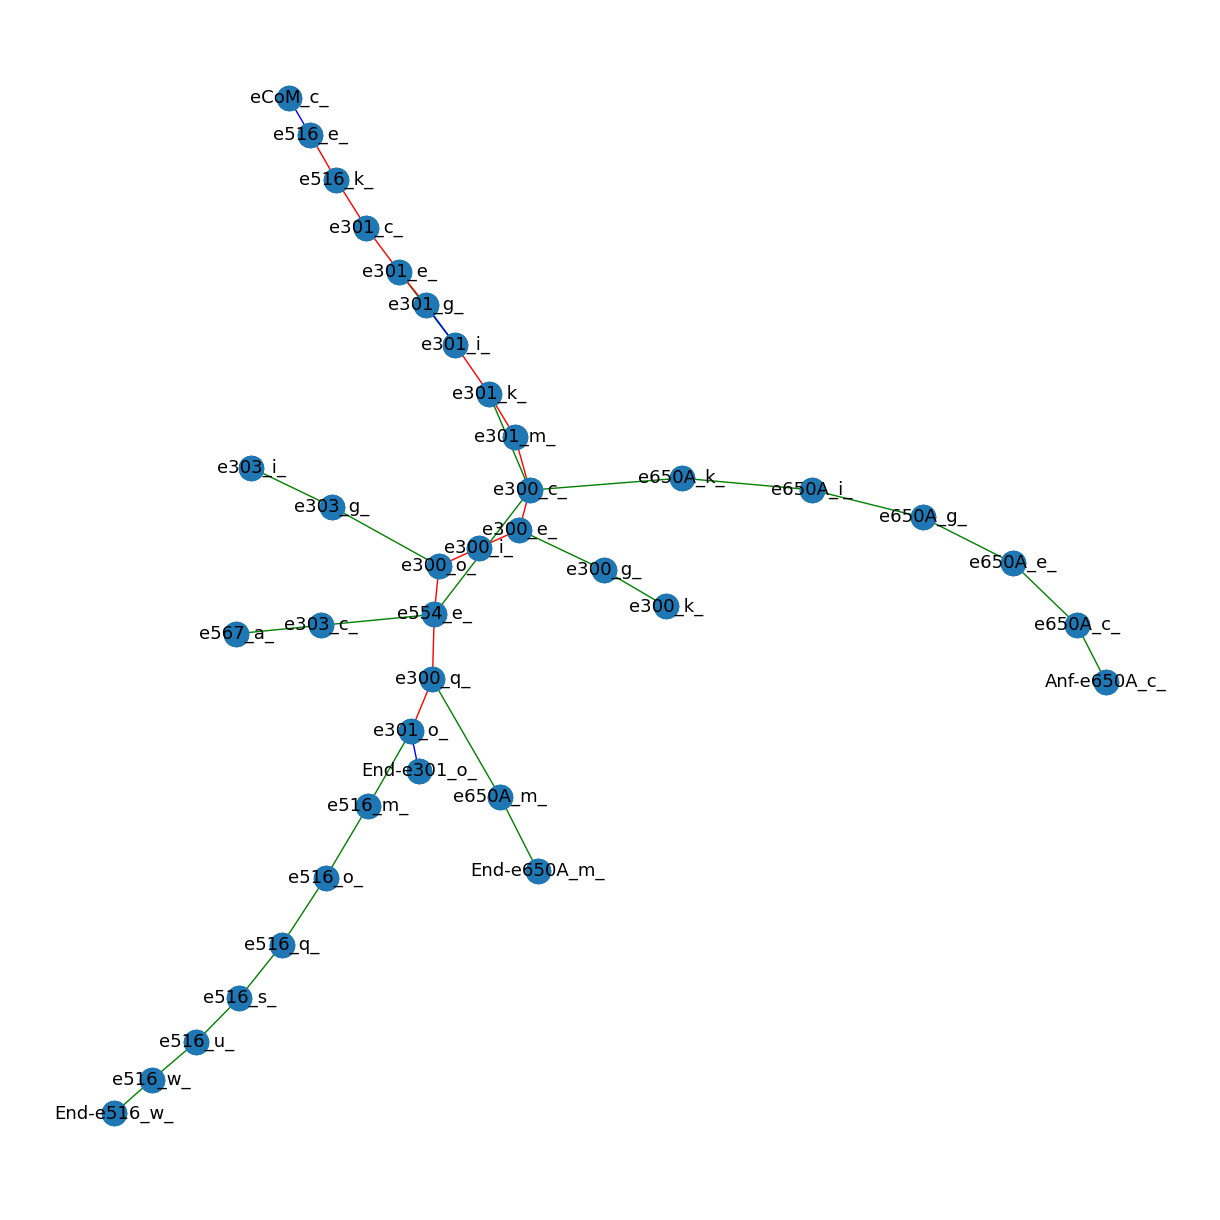

e300_c_anfangssituation_ankunft_und_erkundigung_der_not
e300_e_vorfeld_des_kampfes_bis_zum_sieg
e300_g_nach_dem_sieg_bis_zur_trennung_des_HD_und_des_OB
e300_i_rueckkehr_des_OB_und_die_suche_nach_dem_HD
e300_k_misshandlung_des_FH_bis_zur_hochzeit
e300_o_auftritt_des_HD_vor_dem_AG_bis_zur_erkennung_seiner_heldentat
e300_q_von_der_begegnung_mit_dem_vogel_bis_zum_ende_des_fluges
e301_c_verlust_des_OB
e301_e_vom_beginn_der_reise_bis_zum_finden_der_raststaette_oder_eines_eingangs
e301_g_vom_finder_einer_nachtrast_bis_zum_betreten_der_welt_des_AN
e301_i_vom_betreten_des_wohnsitzes_des_AN_bis_zur_befreiehung_des_OB
e301_k_empfang_des_OB_und_verrat_des_FH
e301_m_entkommen_aus_dem_haus_des_AN
e301_o_von_der_rueckkehr_an_die_oberflaeche_bis_zur_loesung_der_durch_den_raub_verursachten_krise
e303_c_eingangssituation_bis_zur_trennung
e303_g_erstes_treffen_mit_dem_AN
e303_i_von_der_erkundigung_der_not_bis_zum_aufbruch_des_HF_zum_AN
e516_e_fernliebe_bis_zum_auszug_auf_der_suche_nach_dem_OB
e516_k_gewi

In [6]:
haeufigkeit=2
auto_graph=cutoff_graph_data(graph, haeufigkeit)
G,W = graph_bauer(auto_graph)
plt.figure(figsize=(12, 12)) #15,12 || 12,9 || 9,9
show_graph(G,W)
def make_set_of_chosen_vertives(graph_edge_data):
    chosen_vertices=set()
    for sub_list in graph_edge_data:
        sub_sub_list = sub_list[1]
        chosen_vertices.add(sub_sub_list[0])
        chosen_vertices.add(sub_sub_list[1])
    return chosen_vertices
graph_data = cutoff_graph_volldata(graph, haeufigkeit)
chosen_vertices=list(make_set_of_chosen_vertives(graph_data))
chosen_vertices.sort()    
for vertex_name in chosen_vertices:
    if not (vertex_name.startswith("End") or vertex_name.startswith("Anf")or vertex_name.startswith("eUNDF")):
        print(vertex_name)